# 머신러닝

### 교차검증
- 모든 데이터를 활용할 수 있고 모델의 변동성을 줄이고 오버피딩을 막아줌

#### (1) K 폴드 교차검증

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#### (2) 단일 관측지 제거 방식(LOOCV)

In [4]:
# LeavOneout ==> n개 중 1개를 테스트 용으로 n-1개를 학습용으로 진행(n번 테스트)
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model,X,y,cv=LeaveOneOut())
scores # 1 성공, 0 실패 총 n(150)개

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
scores.mean()

0.96

### 최적의 모델 찾기(성능이 낮을 떄)
- 더 복잡(언더피팅된 경우) or 유연한 모델(오버피팅된 경우) 사용 
- 더 많은 훈련 표본 수집 
- 더 많은 데이터 수집(표본의 특징 추가를 위해)

### 편향-분산 트레이드오프
- 고편향(언더피트), 고분산(오버피트)

In [6]:
# PolynomialFeatures ==> 모델의 복잡도 조절을 위한 기능(ex - 차수증가)
# make_pipeline ==> 여러 객체를 seamless하게 수행(생산성 높아짐)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [7]:
np.random.seed(1)
X = np.random.rand(40,1)**2
y = (10-1. / (X.ravel()+0.1)) + np.random.randn(40)

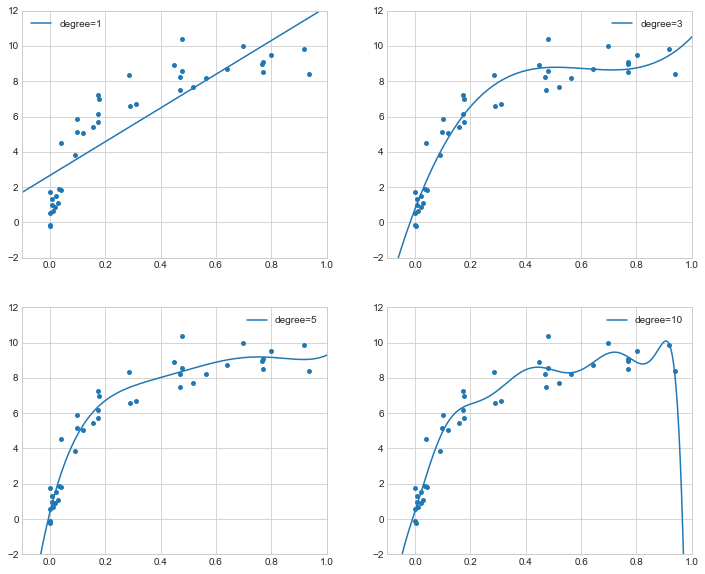

In [8]:
# degree에 따른 그래프 모양 확인하기(이후 검증곡선으로 최적의 degree 찾을 것)
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

X_test = np.linspace(-0.1,1.1,500).reshape(-1,1)

fig = plt.figure(figsize=(12,10))
for i,degree in enumerate([1,3,5,10],start=1):
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(),y,s=15)
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,y).predict(X_test)
    ax.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
    ax.set_xlim(-0.1,1.0)
    ax.set_ylim(-2,12)
    ax.legend(loc='best') # loc='best'알아서 가장 좋은 곳에 배치시키라

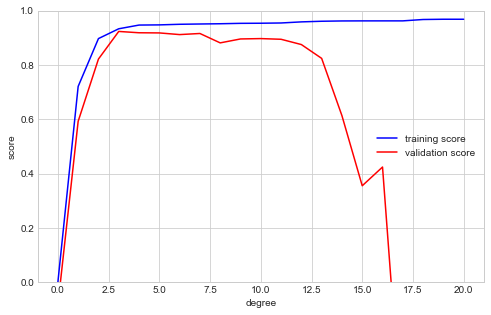

In [9]:
# 검증곡선 그리기
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2),LinearRegression()),X, y, "polynomialfeatures__degree", degree, cv=7)

plt.figure(figsize=(8, 5))
plt.plot(degree, np.median(train_score, 1), "b-", label="training score")
plt.plot(degree, np.median(val_score, 1), "r-", label="validation score")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best");

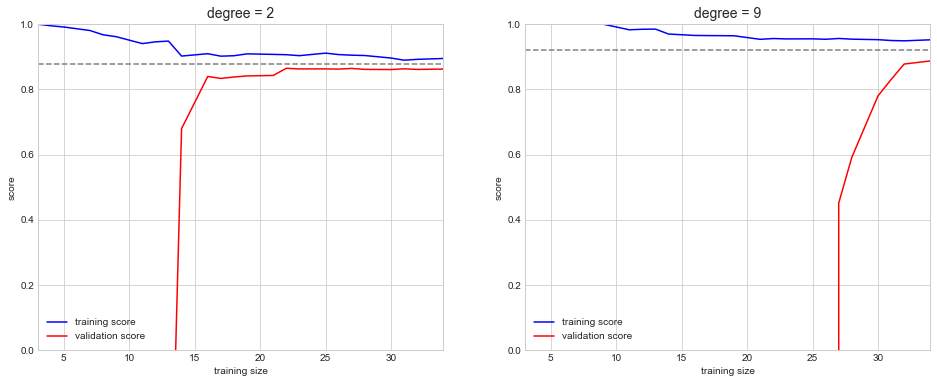

In [10]:
# 모델에서 데이터의 규모는 중요한데, 데이터 규모가 커져도 성능의 개선이 효과를 보이지 않는 지점이 있음
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for i, degree in enumerate([2, 9]):
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree=degree), LinearRegression()), X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))
    ax[i].plot(n, np.mean(train_lc, 1), "b-", label="training score")
    ax[i].plot(n, np.mean(val_lc, 1), "r-", label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color="gray", linestyle="dashed")
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0, 1), xlabel="training size", ylabel="score")
    ax[i].set_title("degree = {}".format(degree), size=14)
    ax[i].legend(loc="best");

### 그리드 서치

In [11]:
# 그리드 서치 => 파라미터를 수정하여 최선의 결과를 자동으로 찾아내기 위한 도구
# 차원을 0~20까지, 정규화 True or False, fit_intercept Ture or False (총 80가지)
from sklearn.model_selection import GridSearchCV

params = {"polynomialfeatures__degree": np.arange(21),
          "linearregression__fit_intercept": [True, False],
          "linearregression__normalize": [True, False]}

grid = GridSearchCV(make_pipeline(PolynomialFeatures(),LinearRegression()), params, iid=True, cv=7)

In [12]:
grid.fit(X, y);

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [13]:
# best_params_ ==> 가장 최적의 파라미터값 출력
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

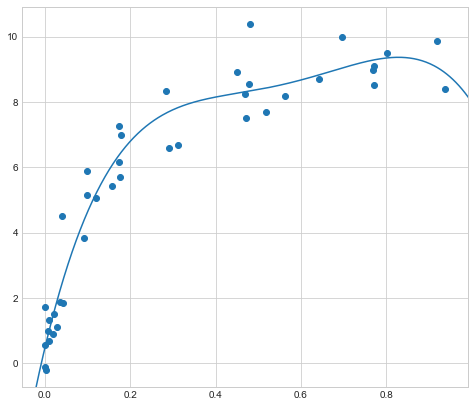

In [14]:
# 최적 파라미터 모델 시각화
model = grid.best_estimator_ # 최적 파라미터값 저장

plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

### 특징공학
- 머신러닝의 특징 행렬을 구축하는데 사용할 수 있는 수치형 데이터로 변환하는 것

#### (1) 범주 특징의 변환

In [15]:
data = [{'price':120000000, 'rooms':3, 'location':'잠실동'},{'price':70000000, 'rooms':4, 'location':'천호동'},
        {'price':130000000, 'rooms':4, 'location':'신천동'},{'price':450000000, 'rooms':2, 'location':'천호동'},]

In [16]:
# DictVectorizer ==> 수치형 데이터가 아닌 것을 0,1의 수치형 데이터로 전환
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False, dtype=np.int)
dv.fit_transform(data)

array([[        0,         1,         0, 120000000,         3],
       [        0,         0,         1,  70000000,         4],
       [        1,         0,         0, 130000000,         4],
       [        0,         0,         1, 450000000,         2]])

In [17]:
dv.get_feature_names()

['location=신천동', 'location=잠실동', 'location=천호동', 'price', 'rooms']

In [18]:
# sparse ==> 희소행열 여부(True면 희소행렬로 만듬 - 메모리 적게 사용)
dv = DictVectorizer(sparse=True, dtype=np.int)
dv.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

#### (2) 텍스트 특징의 변환

In [19]:
text = ['mobile phone','battlegrounds mobile game','phone game']

In [20]:
# CountVectorizer ==> 특징 행렬로 변환
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [21]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0,0,1,1
1,1,1,1,0
2,0,1,0,1


In [22]:
# TfidfVectorizer ==> 특징 행렬로 변환하는데 가중값으로 계산
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X = tv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [23]:
pd.DataFrame(X.toarray(), columns=tv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


#### (3) 유도 특징의 추가

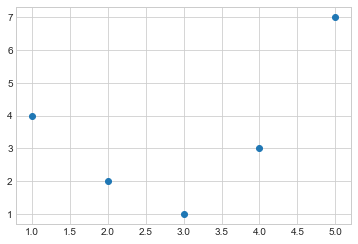

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,6)
y = np.array([4,2,1,3,7])
plt.scatter(x,y);

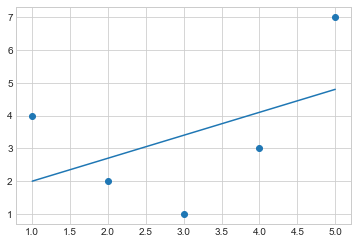

In [25]:
# 고편향(언더피트)된 모델임으로 복잡도를 높여줘야 함
from sklearn.linear_model import LinearRegression

X = x.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
plt.scatter(x,y)
plt.plot(x,y_pred);

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=False)
X2 = poly.fit_transform(X)
print(X2) # X의 구조가 5행1열 -> 5행3열로 바뀜(차수 증가)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


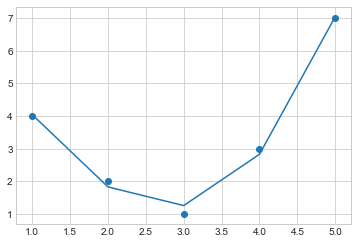

In [27]:
model = LinearRegression()
model.fit(X2,y)
y_pred = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,y_pred);

#### (4) 누락데이터 대체

In [28]:
X = np.array([[np.nan, 0, 5],
              [4, 8, 9], 
              [3, 6, 3],
              [5, np.nan, 8],
              [9, 5, 0]])
y = np.array([16, 14, 8, -3, -1])

In [29]:
# SimpleImputer ==> strategy에 따라서 누락값들을 대체함
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X2 = imputer.fit_transform(X)
X2

array([[5.25, 0.  , 5.  ],
       [4.  , 8.  , 9.  ],
       [3.  , 6.  , 3.  ],
       [5.  , 4.75, 8.  ],
       [9.  , 5.  , 0.  ]])

### (5) 특징 파이프라인

In [30]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),PolynomialFeatures(degree=2),LinearRegression())

In [31]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [32]:
print(y)
print(model.predict(X));

[16 14  8 -3 -1]
[16. 14.  8. -3. -1.]
